# Part 4 - Exploratory Data Analysis on the Recipes Dataset

#### Name: Amirhossein Kiani
#### Contact: ahosseinkiani@gmail.com

In the previous notebooks we performed a through data wrangling, feature engineering and topic modeling. In this notebook we use the fruit of our labor and perform Exploratory Data Analysis (EDA) on the data we have obtained so far. Here is a breakdown of different sections of the notebook:

### Table of Contents

- [Imports and Sanity Checks](#imports)
- [Basic Statistics](#stats)
- [Categories and Ingredients](#cat)
- [Ratings and Top-Rank Recipes](#ratings)
- [Nutrition and Its Extreme Cases](#nutr)
- [Authors](#authors)
- [Correlation Between Variables](#corr)
- [Time Series Analysis](#time)

## Imports and Sanity Checks<a class ='author' id='imports'></a>

In [1]:
# Making sure we're in the right environment

import sys
sys.executable

'C:\\Users\\mathe\\anaconda3\\envs\\deepchef\\python.exe'

In [35]:
# Importing the regular libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [36]:
# This allows scrolling through all the columns. Useful for dataframes with too many columns

pd.set_option('display.max_columns', 100)

In [4]:
# Importing the version of BasicCleanData.parquet that is enhanced with a column representing 300 topics extracted from all
# ingredients using BerTopic
# This model can be downloaded from this address: 
#https://www.dropbox.com/scl/fi/i5tryqh4mm3ot3ezeo9ht/bertopic_model_July_8?rlkey=74s7lua8hbycqwilt9xg7luy0&dl=1

recipes = pd.read_parquet('CleanDataWithTopicModeling')

In [37]:
recipes.sample(2)

,RecipeId,AuthorId,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions,url,YearPublished,MonthPublished,DayPublished,HourPublished,TotalMinutes,CorrectAggregatedRating,RecipeInstructionsTokenized,BerTopics
314073,326083.0,952456,A lot of people will swear that the best crabc...,Seafood,[Easy],"[1⁄2, 1⁄2, 3⁄8, 1, 1⁄3, 1⁄2, 1⁄2, 1⁄2, 3, 2]","[onion, celery, unsalted butter, jumbo lump cr...",1.0,275.3,19.2,8.5,94.7,420.4,10.8,0.6,2.4,15.0,6.0,[In a skillet cook onion and celery in 4 table...,https://www.food.com/recipe/Crab-Cakes-326083,2008,9,19,22,270,5.0,onion celery unsalted butter jumbo lump crab m...,6_mayonnaise_boiled_crabmeat
164469,172180.0,321390,"Make and share this A Gooey, Decadent Chocolat...",Desserts,[< 4 Hours],"[2 1⁄2, 1 1⁄2, 1, 3⁄4, 2, 3 1⁄2, 1, 2, 1 1⁄2, ...","[cake flour, baking soda, salt, unsalted butte...",NaN,1177.4,51.4,31.5,151.8,741.7,181.9,6.8,126.3,11.7,6.0,[Position an oven rack in the center of the ov...,"https://www.food.com/recipe/A-Gooey,-Decadent-...",2006,6,11,18,80,NaN,cake flour baking soda salt unsalted butter su...,-1_pepper_onion_garlic


In [6]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522512 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   RecipeId                     522512 non-null  float64
 1   AuthorId                     522512 non-null  int32  
 2   Description                  522512 non-null  object 
 3   RecipeCategory               522512 non-null  object 
 4   Keywords                     522512 non-null  object 
 5   RecipeIngredientQuantities   522512 non-null  object 
 6   RecipeIngredientParts        522512 non-null  object 
 7   ReviewCount                  275025 non-null  float64
 8   Calories                     522512 non-null  float64
 9   FatContent                   522512 non-null  float64
 10  SaturatedFatContent          522512 non-null  float64
 11  CholesterolContent           522512 non-null  float64
 12  SodiumContent                522512 non-null  float64
 13 

In [7]:
print(f'The recipes dataset has {recipes.shape[0]} rows and {recipes.shape[1]} variables.')

The recipes dataset has 522512 rows and 28 variables.


## Basic Statistics<a class ='author' id='stats'></a>

Let's take a quick look at some statitics about our dataset:

In [8]:
recipes.describe().T

,count,mean,std,min,25%,50%,75%,max
RecipeId,522512.0,2.718240e+05,1.554945e+05,38.0,137209.75,271760.50,406146.5,5.413830e+05
AuthorId,522512.0,4.572629e+07,2.929728e+08,27.0,69474.00,238961.50,565828.0,2.002886e+09
ReviewCount,275025.0,5.227790e+00,2.038146e+01,1.0,1.00,2.00,4.0,3.063000e+03
Calories,522512.0,4.844298e+02,1.397111e+03,0.0,174.20,317.10,529.1,6.128546e+05
FatContent,522512.0,2.461401e+01,1.114851e+02,0.0,5.60,13.80,27.4,6.436810e+04
SaturatedFatContent,522512.0,9.559027e+00,4.662201e+01,0.0,1.50,4.70,10.8,2.674060e+04
CholesterolContent,522512.0,8.647234e+01,3.018131e+02,0.0,3.80,42.60,107.9,1.304564e+05
SodiumContent,522512.0,7.672596e+02,4.203640e+03,0.0,123.30,353.30,792.2,1.246921e+06
CarbohydrateContent,522512.0,4.908936e+01,1.808229e+02,0.0,12.80,28.20,51.1,1.082946e+05
FiberContent,522512.0,3.843263e+00,8.603200e+00,0.0,0.80,2.20,4.6,3.012000e+03


We notice an inetersting common pattern patterns: the presence of **very powerful outliers in our nutritional data**. Let's look at two examples:

**Calories:**
- The mean of `Calories`is around 484 gr, with standard deviation of 1397. This indicates that the values of Calories are widely spread out from the mean. There is a considerable amount of variation in the data, as indicated by the magnitude of the standard deviation.
- The distribution of calorie values is likely to be highly skewed to the right. Since 75% of the recipes have a calorie count of 579 or lower, but the maximum calorie count is significantly higher at 612,854, it suggests that there are a few extreme outliers with extremely high calorie values that are influencing the maximum value.

**FatContent:**
- The average `FatContent` is 24.6 gr. Again, similar to `Calories`, 75% of the recipes have fat content of up to 27.4 gr, but some extreme outliers, with maximum fat content of 64,368 gr cause teh distribution to be highly right-skewed.

Other notable information that we can extract from this table are as follows:

**TotalMinutes:**
- The average prepration time is 63 minutes, i.e., around 1 hour. Up to 25% of the recipes are ready in 20 minutes, 50% are ready in 40 minutes, and 75% are ready in 67 minutes, which is very close to the average. The maximum prepration time is about 595 minutes, which is around 10 hours. I bet this is some heavy meaty recipe!

**ReviewCount:**
- The average number of rebiews a recipe has received is around 5. 75% of the recipes have recived up to 4 reviews. The maximum number of reviews per recipe is 3,063; this must be an insanely popular recipe!

**CorrectAggregatedRating:**
- the average rating of a recipe is 4.43 (out of 5), with a low standard deviation of 76%. 20% of the recipes have received a rating of 4 or low, 50% of them 4.75 or low, and when we hit the 75th percentile, recipes get ratings up to 5.

We will explore the extreme cases later in the notebook to get a better picture of the landscape.

## 2. Categories and Ingredients<a class ='author' id='cat'></a>

Let's take a look at the distribution of our recipes over different categories:

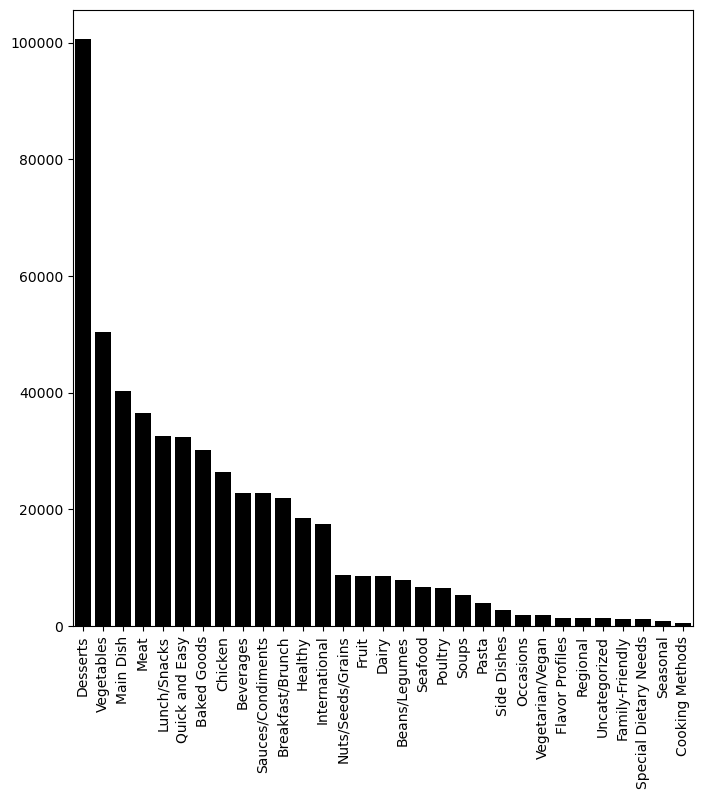

In [9]:
plt.figure(figsize=(8,8))
sns.barplot(x=recipes['RecipeCategory'].value_counts().index,y=recipes['RecipeCategory'].value_counts().values,color='black')
plt.xticks(rotation=90);

This shows that Desserts have dominated the scene, with over 100k recipes in our dataset! That's about 20% of our data. A more granular breakdown of the distribution is given below:

In [10]:
recipes['RecipeCategory'].value_counts()/len(recipes)*100

Desserts                 19.256208
Vegetables                9.630018
Main Dish                 7.700302
Meat                      6.978022
Lunch/Snacks              6.236412
Quick and Easy            6.210766
Baked Goods               5.766375
Chicken                   5.049071
Beverages                 4.367747
Sauces/Condiments         4.365641
Breakfast/Brunch          4.193779
Healthy                   3.525087
International             3.348057
Nuts/Seeds/Grains         1.668670
Fruit                     1.639388
Dairy                     1.619484
Beans/Legumes             1.510779
Seafood                   1.260067
Poultry                   1.248775
Soups                     0.996724
Pasta                     0.758260
Side Dishes               0.502189
Occasions                 0.354442
Vegetarian/Vegan          0.352911
Flavor Profiles           0.266405
Regional                  0.252434
Uncategorized             0.243057
Family-Friendly           0.233679
Special Dietary Need

Now let's see what's the ditribution of recipe topics based on the 300 topics that I have extracted using BerTopic

In [27]:
# Topic -1 is the uncategorized topic. Since it take a huge portion of data, lt's drop it for vizualization purpouses
# Also we have 300 topics, which is hard to capture using a barplot. I'll choose the top 30.
bertopics = recipes.drop(recipes[recipes['BerTopics'] == '-1_pepper_onion_garlic'].index, inplace=False)['BerTopics'].value_counts()
bertopics

0_asparagus_salmon_fillet        45792
1_baking_soda_oat                21049
2_skinless_boneless_breast        7421
3_yogurt_plain_turmeric           6382
4_date_pecan_pitted               5544
                                 ...  
294_stewing_burgundy_mushroom       17
295_rose_mineral_amaretto           17
296_kumquat_brandy_habanero         16
297_cabbage_canning_kasha           16
298_craisins_cashew_craisin         15
Name: BerTopics, Length: 299, dtype: int64

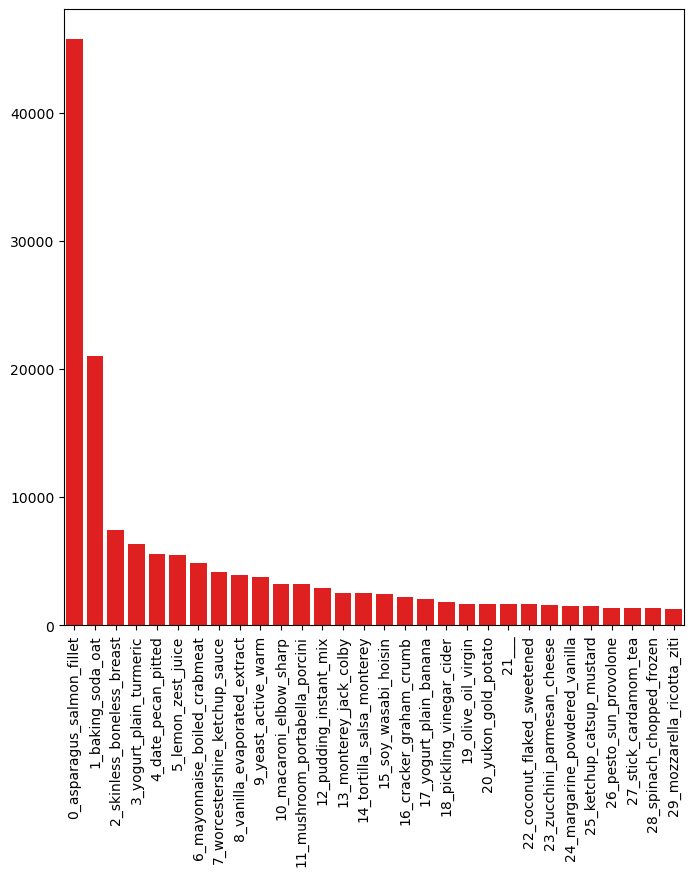

In [30]:
plt.figure(figsize=(8,8))
sns.barplot(x=bertopics[:30].index,y=bertopics[:30].values,color='red')
plt.xticks(rotation=90);

Since the model's vizualiations are very heavy, I'm sharing a screenshot of them here. Two types of vizualization are performed on the data:
- Intertopic Distance Map
- Document Vizualization

**NOTE:** These vizualizations are interactive, giving the user teh ability to zoom in and out, select and deselect and so on.

Learn more about these here: https://maartengr.github.io/BERTopic/getting_started/visualization/visualization.html

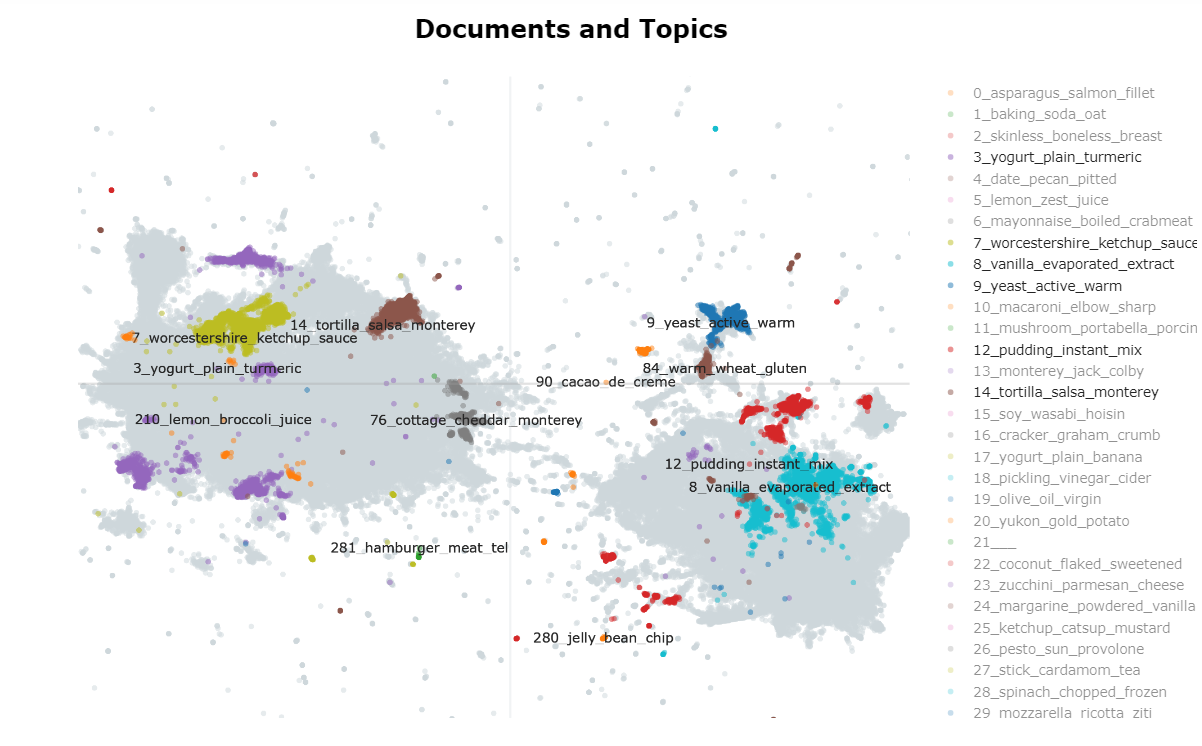


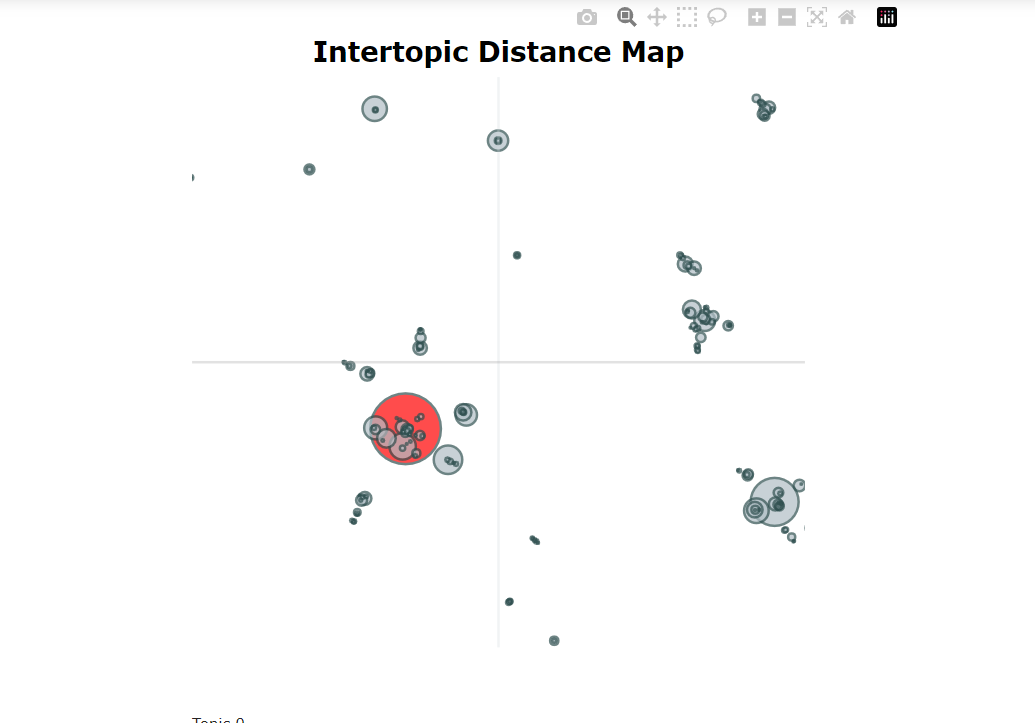

Finally, let's see what are the most common ingredients accross the entire dataset. I use a Wordcloud to vizualize this:

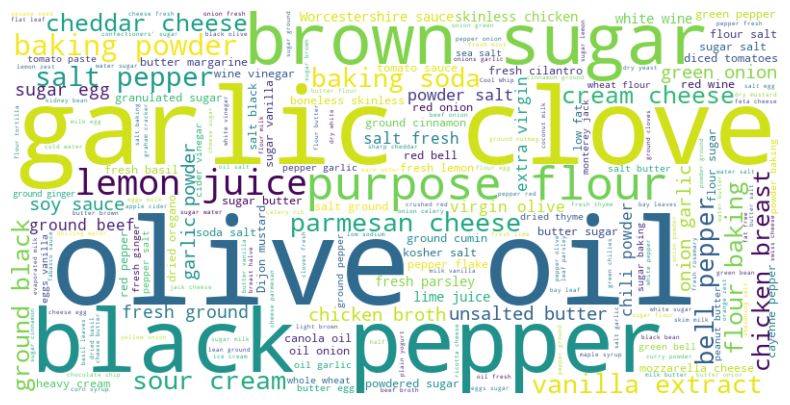

In [128]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Create an empty string to concatenate all ingredient lists
all_ingredients = ""

# Iterate over each row in the 'RecipeIngredientParts' column
for ingredients_list in recipes['RecipeIngredientParts']:
    # Join the ingredients list into a single string
    ingredients_string = ' '.join(ingredients_list)
    # Concatenate the string with all ingredients
    all_ingredients += " " + ingredients_string

# Generate the word cloud from all ingredients
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_ingredients)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Ratings and Top-Rank Recipes <a class ='author' id='ratings'></a>

In the Basic Statistics section, we noted that the majority of our ratings have recieved a rating up to 5. Here's a vizual that shows the distribution of ratings over recipes:

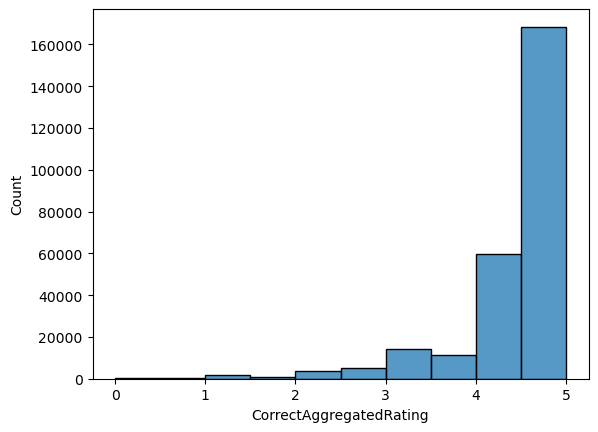

In [32]:
sns.histplot(recipes['CorrectAggregatedRating'],bins=10);

We can see that the majority of the recipes have recived 5. 

**Note** that `CorrectAggregatedRating` is not necessarily an accurate measure of recipe popularity. It averages the ratings given for a food, but for recipes that have, say, only 1 rating which is a  5-star (given by the author's cousin or someone who actually tried it), that still counts a 5. Similarly for other ratings.

What would be more accurate as a measure of popularity is when a relatively high number of ratings are given and yet `CorrectAggregatedRating` is high (or low). 

For now let's explore some highly rated recipes:

In [33]:
top_reviews = recipes['ReviewCount'].sort_values(ascending=False).dropna()
top_reviews

41924     3063.0
1436      2273.0
23725     1692.0
84057     1657.0
35377     1586.0
           ...  
213893       1.0
213890       1.0
213889       1.0
213883       1.0
522431       1.0
Name: ReviewCount, Length: 275025, dtype: float64

Let's filter out the top 20 ones out of these:

In [92]:
top_reviews.head(20)

41924     3063.0
1436      2273.0
23725     1692.0
84057     1657.0
35377     1586.0
32174     1410.0
62823     1409.0
50172     1384.0
19387     1326.0
28625     1284.0
405555    1256.0
22241     1150.0
64670     1068.0
68812     1040.0
64455      973.0
30311      940.0
77165      908.0
22426      896.0
80577      848.0
24640      835.0
Name: ReviewCount, dtype: float64

In [40]:
top_20_recipes = recipes[recipes['ReviewCount']>=835]
top_20_recipes.sort_values(['ReviewCount'],ascending=False)

,RecipeId,AuthorId,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions,url,YearPublished,MonthPublished,DayPublished,HourPublished,TotalMinutes,CorrectAggregatedRating
41924,45809.0,58278,I searched and finally found this recipe on th...,Chicken,"[Chicken, Poultry, Meat, Chinese, Asian, High ...","[2, 1 -2, 1, 1⁄4, 3⁄4, 1⁄4, 1⁄3, 2, 1, 1⁄2, 1⁄3]","[boneless chicken breasts, olive oil, garlic c...",3063.0,521.4,24.5,6.5,145.3,1573.0,23.4,0.3,21.5,50.1,4.0,[Editor's Note: Named Bourbon Chicken because...,https://www.food.com/recipe/Bourbon-Chicken-45809,2002,11,12,20,35,4.31
1436,2886.0,1762,Make and share this Best Banana Bread recipe f...,Baked Goods,"[Breads, Fruit, Oven, < 4 Hours]","[1⁄2, 1, 2, 3, 1 1⁄2, 1, 1⁄2, 1⁄2]","[butter, granulated sugar, eggs, bananas, all-...",2273.0,272.8,10.5,6.2,61.6,338.3,42.5,1.4,24.4,3.7,10.0,"[Remove odd pots and pans from oven., Preheat ...",https://www.food.com/recipe/Best-Banana-Bread-...,1999,9,26,20,70,4.22
23725,27208.0,28201,"Amazing flavor, and so simple! No salt needed ...",Main Dish,"[Roast Beef, Meat, Kid Friendly, Potluck, Wint...","[1, 1, 1, 1, 1⁄2]","[beef roast, water]",1692.0,295.2,9.7,3.9,149.8,380.6,2.6,0.1,0.0,49.5,8.0,"[Place beef roast in crock pot., Mix the dried...",https://www.food.com/recipe/To-Die-for-Crock-P...,2002,5,3,15,545,4.28
84057,89204.0,137839,I love this Crock-Pot chicken recipe for two r...,Main Dish,"[Chicken Breast, Chicken, Poultry, Corn, Veget...","[4 -5, 1, 1, 1, 1]","[boneless chicken breasts, black beans, corn, ...",1657.0,679.2,35.0,15.2,155.3,913.4,50.1,11.2,9.9,45.9,4.0,"[Take 4-5 frozen, yes, frozen, boneless chicke...",https://www.food.com/recipe/Crock-Pot-Chicken-...,2004,4,16,20,243,4.22
35377,39087.0,30534,Make and share this Creamy Cajun Chicken Pasta...,Chicken,"[Chicken, Poultry, Meat, Cajun, Kid Friendly, ...","[2, 4, 2, 2, 1, 1⁄2, 2, 1⁄4, 1⁄4, 1⁄8, 1⁄8, 1⁄4]","[boneless skinless chicken breast halves, ling...",1586.0,719.1,41.1,24.0,198.6,816.8,47.4,2.5,3.1,39.3,2.0,[Place chicken and Cajun seasoning in a bowl a...,https://www.food.com/recipe/Creamy-Cajun-Chick...,2002,9,2,19,25,4.54
32174,35813.0,8688,"You've made oatmeal-raisin cookies before, so ...",Desserts,"[Dessert, Lunch/Snacks, Cookie & Brownie, < 30...","[2, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1 1⁄2]","[all-purpose flour, baking soda, baking powder...",1410.0,188.6,6.4,3.5,23.9,117.1,30.3,1.8,15.1,3.5,36.0,"[Preheat oven to 350°., Whisk dry ingredients;...",https://www.food.com/recipe/Oatmeal-Raisin-Coo...,2002,7,30,19,26,4.44
62823,67256.0,82367,This is one of (if not) the BEST banana cake I...,Desserts,"[Tropical Fruits, Fruit, Weeknight, For Large ...","[1 1⁄2, 2, 3, 1 1⁄2, 1⁄4, 3⁄4, 2 1⁄8, 3, 2, 1 ...","[bananas, lemon juice, flour, baking soda, sal...",1409.0,503.5,20.6,12.3,89.5,365.4,75.7,1.0,55.7,5.5,16.0,"[Preheat oven to 275°F (135C)., Grease and flo...",https://www.food.com/recipe/Best-Ever-Banana-C...,2003,7,24,20,75,4.33
50172,54257.0,24670,Absolutely delicious meatloaf and sauce! Those...,Meat,"[Meat, Roast, Oven, < 4 Hours]","[1 1⁄2, 1, 1, 1, 1, 1⁄4, 4, 1⁄2 - 2⁄3, 4, 2 -4...","[ground beef, egg, sweet onion, table salt, bl...",1384.0,493.1,28.1,11.0,165.2,1260.5,23.2,0.4,18.9,35.5,NaN,[Meatloaf: Combine meat loaf ingredients and p...,"https://www.food.com/recipe/Yes,-Virginia-Ther...",2003,2,17,20,80,4.21
19387,22782.0,25455,My kids will give up a steak dinner for this s...,Pasta,"[Pork, Meat, European, Kid Friendly, Weeknight...","[2, 1, 3 -4, 1, 2, 2, 2, 3, 2, 1 1⁄2, 1, 1⁄4 -...","[Italian sausage, onion, garlic cloves, diced ...",1326.0,555.9,26.3,9.0,51.8,2058.6,50.1,3.8,11.4,29.8,NaN,"[In large, heavy stockpot, brown Italian sausa...",https://www.food.com/recipe/Jo-Mama's-World-Fa...,2002,3,17,10,80,4.42
28625,32204.0,37305,"These are absolutely the chewi

- We can see the the most popular recipe is a chicken recipe. In fact, chicken seems more popular in the top-10 list; even checking out the actual recipes of some of the ones that fall under `Main Dish` reveals that they're in fact chicken recipes.

- We can also see that an anomaly in this list is the recipe with index 405555, which is just ice cubes. This is an anomally in terms of nutritional factors, bringing the avergae of all of these factors down due to its 0 value.

In [49]:
top_20_recipes.loc[405555, 'url']

'https://www.food.com/recipe/Ice-Cubes-420398'

#### 3.1. Basic Stats

We can already see that all the ratings are fairly high. The exception to this is the icecube recipe, with a rating of 2.84. I'll just drop this 'recipe' to get a better picture of things. 

In [61]:
top_20_recipes['CorrectAggregatedRating'].drop([405555],axis=0).mean()

4.40842105263158

We can see that the average rating of our top (19) recipes is 4.40.

Let's see if we have one person as the author of more than one recipe:

In [63]:
top_20_recipes['AuthorId'].value_counts()

89831     2
1762      1
58278     1
137839    1
60575     1
101604    1
29196     1
82367     1
24670     1
30534     1
25455     1
8688      1
46318     1
37305     1
6258      1
28201     1
76261     1
16827     1
175574    1
Name: AuthorId, dtype: int64

We do! And it turns out that this person is a top overal author in the whole dataset, with over 3,900 contributions:

In [64]:
recipes['AuthorId'].value_counts()

37779         7742
283251        6375
89831         3926
57042         3435
883095        3399
              ... 
510217           1
824090           1
374882           1
827464           1
2001302649       1
Name: AuthorId, Length: 57178, dtype: int64

#### 3.2. Years Published

Let's check the years they were published (`YearPublished`):

In [45]:
top_20_recipes['YearPublished'].value_counts()

2002    10
2003     5
2004     3
1999     1
2010     1
Name: YearPublished, dtype: int64

Mostly in 2002! This is interesting -- I wonder why this is. Notably this is not the year where the majority of recipes come from, in the original dataset -- in fact, 2002 is the 7th in terms of the number of recipes:

In [46]:
recipes['YearPublished'].value_counts()

2007    70204
2008    69485
2009    58036
2006    51409
2005    41002
2010    37375
2002    32456
2003    29372
2004    26686
2011    24993
2012    20895
2013    18203
2014     8638
2001     7714
2017     4998
2015     4845
2016     4269
1999     3668
2018     3035
2000     1886
2019     1789
2020     1554
Name: YearPublished, dtype: int64

#### 3.3. Ingredients

What are the dominant ingredients among our top recipes? Let's plot a word cloud to see:

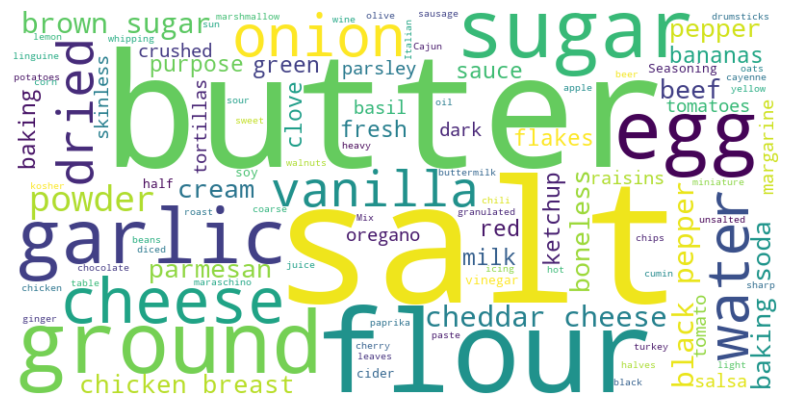

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Create an empty string to concatenate all ingredient lists
all_ingredients = ""

# Iterate over each row in the 'RecipeIngredientParts' column
for ingredients_list in top_20_recipes['RecipeIngredientParts']:
    # Join the ingredients list into a single string
    ingredients_string = ' '.join(ingredients_list)
    # Concatenate the string with all ingredients
    all_ingredients += " " + ingredients_string

# Generate the word cloud from all ingredients
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_ingredients)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Nutrition and Its Extreme Cases <a class ='author' id='nutr'></a>

Earlier in the notebook we noted that all the nutritional variables (protein, fat, etc.) in our recipes dataset have certain extreme values that affect the statistics of our datasets. Let's explore some of those extremes here.

Since we have too many nutritional variables, I won't explore the extreme cases for each single one. Instead, I'll do this for one of the variables (`Calories`). The rest of teh variables can be analyses in a similar manner.

In [90]:
# Pin down the top-20 high-calorie recipes

too_20_calories = recipes.sort_values(['Calories'], ascending=False).head(20)
too_20_calories

,RecipeId,AuthorId,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions,url,YearPublished,MonthPublished,DayPublished,HourPublished,TotalMinutes,CorrectAggregatedRating
254537,264817.0,64642,"An heirloom, butchering-time recipe impractica...",Meat,"[Pennsylvania Dutch, European, Free Of..., Sav...","[200, None, 1 1⁄2, 1⁄2, 1⁄2]","[beef, water, fine salt, brown sugar]",NaN,612854.6,64368.1,26740.6,89892.0,287613.6,222.7,0.0,220.2,7454.9,NaN,"[Scrub a good oak barrel thoroughly., Put as m...",https://www.food.com/recipe/How-to-Make-Corned...,2007,11,11,10,480,NaN
185088,193435.0,374913,Make and share this Tennessee Moonshine recipe...,Beverages,"[Low Protein, Low Cholesterol, Healthy, < 30 M...","[50, 10, 200, 12, 200]","[cornmeal, sugar, water]",3.0,434360.2,840.8,118.0,0.0,31777.7,108294.6,1748.6,90682.3,1980.8,1.0,[To boiled cornmeal add yeast and lots of suga...,https://www.food.com/recipe/Tennessee-Moonshin...,2006,11,1,20,20,NaN
501590,519856.0,1803395015,"Saucy and succulent mint Lamb, best sided with...",Side Dishes,"[Lamb/Sheep, Potato, Vegetable, Meat, < 4 Hours]","[2, 2, 2, 1, 1, 1, None, 3, 500, 1, 1, 2]","[peach chutney, mint, mixed herbs, salt, peppe...",1.0,350473.1,30123.7,13269.4,83404.5,63267.3,26.2,4.8,5.8,18396.2,NaN,"[Put The Chutney into a mixing bowl., mix in a...",https://www.food.com/recipe/Italian-Mint-Lamb-...,2014,12,4,0,80,NaN
218186,227470.0,485396,Make and share this Deep Fried Prime Rib recip...,Meat,"[Very Low Carbs, < 4 Hours, Easy]","[8 -10, 3, 2, 2, 2, None]","[ground rosemary, fresh rosemary, kosher salt,...",1.0,101614.7,11169.4,2079.0,2467.6,5523.4,4.3,2.1,0.0,636.0,NaN,[The night before you plan to serve your prime...,https://www.food.com/recipe/Deep-Fried-Prime-R...,2007,5,11,13,100,4.00
53650,57827.0,37183,This is for VERY special occasions only - it t...,Quick and Easy,[Easy],"[1, 40, 17, 1]","[chocolate, Cool Whip, cherries]",30.0,90904.2,9491.0,5869.7,0.0,4354.5,5415.2,3012.0,166.0,2340.6,NaN,"[Send spouse to Alaska to capture moose, or ha...",https://www.food.com/recipe/Chocolate-Moose-57827,2003,4,3,20,0,4.20
412861,427986.0,177443,A wonderful aromatic flavored herb oil of fres...,International,"[< 15 Mins, No Cook, Easy]","[1, 4, 4]","[fennel leaves, fresh dill leaves]",NaN,70396.6,7963.4,1035.2,0.0,0.0,0.0,0.0,0.0,0.0,NaN,[Pour a little oil out of the bottle and push ...,https://www.food.com/recipe/Fragrant-Fennel-an...,2010,6,1,13,15,NaN
289755,301083.0,144204,I made this in the crock pot with things i had...,Main Dish,"[One Dish Meal, Meat, Easy]","[1 1⁄2 - 2, 1, 1, 2, 1, 1, 1, 2, 1, 3, 1⁄4, 1,...","[green pepper, carrots, celery, tomatoes and g...",NaN,57933.7,699.9,111.8,57.5,9943.9,13409.6,1503.2,1691.7,1796.5,NaN,"[Dice everything to your liking., Dump in the ...",https://www.food.com/recipe/My-Mexican-Beef-St...,2008,4,29,0,440,NaN
382981,396765.0,481218,Soft and Chewy If dough appears to be dry pres...,Desserts,"[Cookie & Brownie, < 30 Mins, Easy]","[2, 2, 8, 2, 16, 6, 3 1⁄2, 2, 1 1⁄4, 16, 5, 4]","[butter, shortening, brown sugar, vanilla, egg...",NaN,54097.4,1932.4,759.7,5404.5,45579.9,8737.9,372.5,4730.0,712.3,NaN,"[Soften butter, in mixing bowl cream smooth 1-...",https://www.food.com/recipe/Oatmeal-Cookies-39...,2009,10,27,18,27,NaN
508837,527324.0,2001060256,Make and share this THE HOUSE OF PERONI AND FR...,International,[< 60 Mins],"[420, 100, 100, 100, 140, 140, 140, 500, 50, 1...","[pasta, pesto sauce, string beans, purple pota...",NaN,51193.4,3368.9,1100.4,130456.4,49866.3,410.1,15.4,141.8,4437.2,4.0,[1)\tPlace the flour on a board or in a bowl. ...,https://www.food.com/recipe/THE-HOUSE-OF-PERON...,2016,6,24,17,45,NaN
378647,392286.0,180317,Our family grew up on this cocoa mix. We neve...,Beverages,"[Winter, < 15 Mins, Easy]","[8, 1, 2, 8]","[dry milk, pow

In [91]:
too_20_calories['RecipeCategory'].value_counts()

Desserts          5
Meat              4
Beverages         2
International     2
Main Dish         2
Baked Goods       2
Side Dishes       1
Quick and Easy    1
Lunch/Snacks      1
Name: RecipeCategory, dtype: int64

We have a wide range of categories, though desserts and meat are more common. But these levels of nutrition are way too high to be only dependent on the category (i.e., we have recipes from those categories, with much lower calories). Let's take a closer look at some of these recipes. 

In [92]:
for url in too_20_calories['url']:
    print(url)

https://www.food.com/recipe/How-to-Make-Corned-Beef-264817
https://www.food.com/recipe/Tennessee-Moonshine-193435
https://www.food.com/recipe/Italian-Mint-Lamb-519856
https://www.food.com/recipe/Deep-Fried-Prime-Rib-227470
https://www.food.com/recipe/Chocolate-Moose-57827
https://www.food.com/recipe/Fragrant-Fennel-and-Dill-Herb-Oil-427986
https://www.food.com/recipe/My-Mexican-Beef-Stew-301083
https://www.food.com/recipe/Oatmeal-Cookies-396765
https://www.food.com/recipe/THE-HOUSE-OF-PERONI-AND-FRANCESCO-MAZZEI-PRESENT-STRACCI-AL-PEST-527324
https://www.food.com/recipe/Powdered-Hot-Cocoa-Mix-392286
https://www.food.com/recipe/Spanakotiropita---(Spinach-and-Cheese-Pie)-427558
https://www.food.com/recipe/MMMMMMMMilky-Way-Cake-82848
https://www.food.com/recipe/Caledonian-Wedding-Cake-18330
https://www.food.com/recipe/My-Mercy!-Strawberry-Cake-75591
https://www.food.com/recipe/New-Orleans-Beignets-378178
https://www.food.com/recipe/Easy,-Easy-Friendship-Cake-48363
https://www.food.com/rec

- Our number-1 winner is a recipe for making corn beef. The resson that we're dealing with such a high level of calories is that 200lb meat is involved in the recipe. We can't exactly tell this by look at the relevant row in the dataset becasue it only has the `RecipeIngredientQuantities` value (200) and `RecipeIngredientParts` value (beef); it's not cleear if the 200 is in grams, killos, pounds or else. (**Note:** in one of the other notebooks I have re-scraped the relevant data from food.com, and these info are preserved.)
- The second item in the list is recipe for 'TENNESSEE MOONSHINE', and for whatever reason, the author has decided to insert the extremely large amounts (even though the recipe is supposed to serve 1 person!). i don't think this is a legit recipe, but the high calries makes sense, since 50 lbs cornmeal and 200lbs sugar is involved.
- The third winner is a total nonesense. All the amounts are low (i teaspon salt, 900gr meat, etc) and yet the calories are ridiculously high.

I won't continue this, but make a **conclusion** as follows:
- High-calorie recipes are either randomly assigned values (by their authors, presumably) or have very large amount of high-calorie ingredients (meat, sugar, etc). The former seems more common!
- This presumably extends to other nutritional factors in the dataset (fat, protein, etc). In fact, a quick scroll-through over the relevant urls seems to confirm this.

## Authors <a class ='author' id='authors'></a>

Let's take a look at our top authors, i.e., the authors with the most contributions.

In [97]:
recipes['AuthorId'].value_counts().head(20)

37779      7742
283251     6375
89831      3926
57042      3435
883095     3399
37449      3301
1533       3032
1072593    2841
287420     2260
6357       2088
232669     1984
58104      1982
305531     1868
64642      1841
169430     1623
17803      1609
80353      1552
4470       1523
327115     1517
118840     1512
Name: AuthorId, dtype: int64

Let's study the top author, with Id=37779:

In [32]:
top_author = recipes[recipes['AuthorId'] ==37779]
top_author

,RecipeId,AuthorId,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions,url,YearPublished,MonthPublished,DayPublished,HourPublished,TotalMinutes,CorrectAggregatedRating,RecipeInstructionsTokenized,BerTopics
21483,24919.0,37779,This dish has become a family holiday favorite...,Nuts/Seeds/Grains,"[Vegetable, Thanksgiving, < 60 Mins, Oven, Easy]","[1, 1, 1, 1, 1]","[frozen broccoli cuts, water chestnuts]",18.0,298.5,16.6,8.8,48.6,1488.7,27.6,4.0,7.9,11.4,NaN,"[Cook rice according to package directions., C...",https://www.food.com/recipe/Broccoli-and-Wild-...,2002,4,11,10,60,4.28,frozen broccoli cut water chestnut,-1_pepper_onion_garlic
21637,25079.0,37779,Make and share this Chicken Acapulco recipe fr...,Chicken,"[Poultry, Meat, Southwestern U.S., Mexican, Po...","[1, 1, 3, 1, 1, 1, 1, 1⁄2, 1⁄4, 1⁄8, 10, 1, 1,...","[onion, butter, margarine, sour cream, green c...",7.0,659.3,33.4,14.6,107.9,1540.9,55.3,3.4,5.8,33.9,6.0,"[In a large saucepan, cook onion in butter unt...",https://www.food.com/recipe/Chicken-Acapulco-2...,2002,4,13,15,75,4.71,onion butter margarine sour cream green chilie...,-1_pepper_onion_garlic
21765,25208.0,37779,Make and share this Raspberry Hot Chocolate re...,Beverages,"[Raspberries, Berries, Fruit, < 15 Mins, Easy]","[1 1⁄2, 1 1⁄2, None]","[Creme de Cacao, Chambord raspberry liquor]",7.0,131.0,0.1,0.1,0.0,3.4,13.7,0.0,13.7,0.0,1.0,[Make hot chocolate according to package direc...,https://www.food.com/recipe/Raspberry-Hot-Choc...,2002,4,14,22,10,5.00,creme de cacao chambord raspberry liquor,186_chambord_liquor_raspberry
21794,25237.0,37779,Make and share this Hot Bacon Appetizers recip...,Meat,"[Meat, < 60 Mins, Easy]","[1⁄2, 3⁄4, 1⁄4, 2, 50]","[bacon, process American cheese, butter, marga...",2.0,40.4,3.8,1.8,7.7,100.3,0.3,0.0,0.2,1.2,NaN,"[Mix together first 4 ingredients., Spread eve...",https://www.food.com/recipe/Hot-Bacon-Appetize...,2002,4,14,22,40,5.00,bacon process american cheese butter margarine...,-1_pepper_onion_garlic
21803,25246.0,37779,Southern Living; This is one of my family's fa...,Lunch/Snacks,"[Tuna, < 60 Mins, Easy]","[1, 1⁄4, 1⁄4, 1⁄4, 1⁄4, 8, 2, 1⁄2, 1⁄4]","[tuna, celery, onion, mayonnaise, eggs, milk, ...",5.0,376.1,18.8,9.7,143.9,553.5,33.4,1.6,7.3,18.2,4.0,"[Mix together tuna, celery, onion, pickle reli...",https://www.food.com/recipe/French-Toast-Tuna-...,2002,4,14,22,40,4.40,tuna celery onion mayonnaise egg milk butter m...,-1_pepper_onion_garlic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496730,514951.0,37779,Make and share this Individual Chicken Cassero...,Chicken,"[Poultry, Meat, < 60 Mins, Oven]","[1, 1⁄2, 1, 1, 2, 2, 1⁄2, 1, 1⁄2, None, None, ...","[olive oil, onion, garlic clove, boneless skin...",NaN,239.6,18.3,9.8,66.9,198.5,10.3,1.8,1.5,8.4,6.0,[Preheat oven to 400 degrees and prepare 6 jum...,https://www.food.com/recipe/Individual-Chicken...,2014,3,28,12,60,NaN,olive oil onion garlic clove boneless skinless...,-1_pepper_onion_garlic
498723,516969.0,37779,Make and share this Gingery Beef Broth With So...,International,"[Low Cholesterol, Healthy, < 60 Mins, Stove Top]","[2, 2, None, 1, None, 1, 2, 1⁄4, 5, 1, None]","[green onions, beef broth, fresh ginger, garli...",NaN,114.9,2.7,0.3,0.0,552.2,19.4,0.4,0.6,5.2,6.0,"[Thinly slice the green onions, reserving the ...",https://www.food.com/recipe/Gingery-Beef-Broth...,2014,6,30,10,60,NaN,green onion beef broth fresh ginger garlic clo...,0_asparagus_salmon_fillet
502783,521057.0,37779,Make and share this Fresh Strawberry Cake With...,Desserts,"[Strawberry, Berries, Fruit, Oven, < 4 Hours]","[1, 1, 1⁄2, 1⁄2, 2, 1 1⁄2, 1 1⁄2, 3⁄4, 1⁄4, 6,...","[egg, sour cream, lemon zest, pure vanilla ext...",1.0,381.9,17.6,10.4,72.1,268.1,52.2,1.1,35.3,4.8,9.0,"[P

Let's see what categories this person has publoished recipes in:

In [123]:
top_author['RecipeCategory'].value_counts()

Desserts                 1084
Meat                      807
Beverages                 744
Quick and Easy            675
Lunch/Snacks              583
Vegetables                528
Chicken                   494
Baked Goods               474
Breakfast/Brunch          423
Healthy                   297
Main Dish                 249
Seafood                   188
Beans/Legumes             161
Nuts/Seeds/Grains         139
Poultry                   132
Dairy                     129
Fruit                     115
Sauces/Condiments          90
Pasta                      83
International              67
Cooking Methods            67
Soups                      55
Side Dishes                45
Uncategorized              32
Seasonal                   18
Regional                   17
Vegetarian/Vegan           17
Flavor Profiles            12
Occasions                  10
Family-Friendly             5
Special Dietary Needs       2
Name: RecipeCategory, dtype: int64

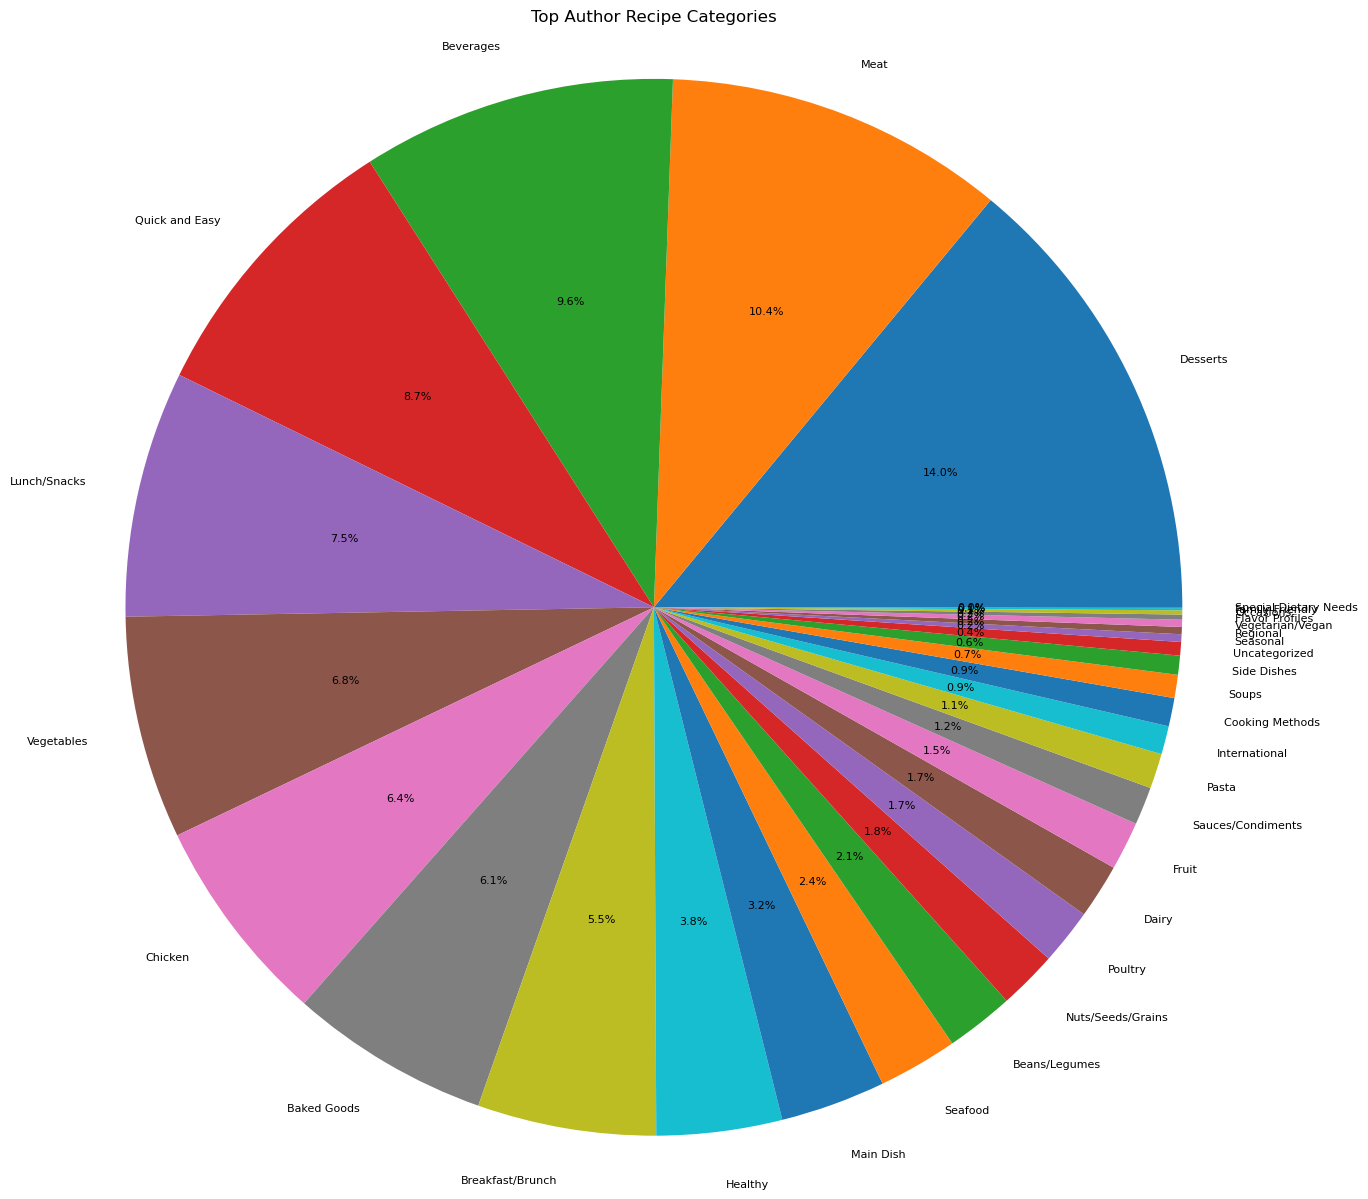

In [34]:
plt.figure(figsize=(15,15))

# Compute value counts for 'RecipeCategory'

category_counts = top_author['RecipeCategory'].value_counts()

# Plotting the pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',textprops={'fontsize': 8})
plt.title('Top Author Recipe Categories')

# Ensure the pie chart is displayed as a circle
plt.axis('equal')

# Show the chart
plt.show()

It looks like they have published in every single category! Let's check:

In [124]:
recipes['RecipeCategory'].nunique() == top_author['RecipeCategory'].nunique()

True

Yep, every single category, some more than others.. I'm truly impressed!!

In [125]:
top_author.describe().loc[['count','mean','min','max']].T

,count,mean,min,max
RecipeId,7742.0,262443.011237,24919.0,521059.0
AuthorId,7742.0,37779.000000,37779.0,37779.0
ReviewCount,3098.0,6.209490,1.0,612.0
Calories,7742.0,483.892302,0.0,38733.8
FatContent,7742.0,23.249806,0.0,2817.5
SaturatedFatContent,7742.0,9.334190,0.0,998.7
CholesterolContent,7742.0,95.994084,0.0,11857.0
SodiumContent,7742.0,700.318768,0.0,84192.2
CarbohydrateContent,7742.0,48.812942,0.0,1724.8
FiberContent,7742.0,3.811883,0.0,102.8


**Some quick facts:**
- We can see that this person, on average has been publishing from 2002 all the way to 2015.
- The average ratings on their recipes are 4.52.
- On average, their recipes have received 6 reviews; the maximum number of reviews is 612.

What are the dominant ingredients that this preson is using in their recipes?

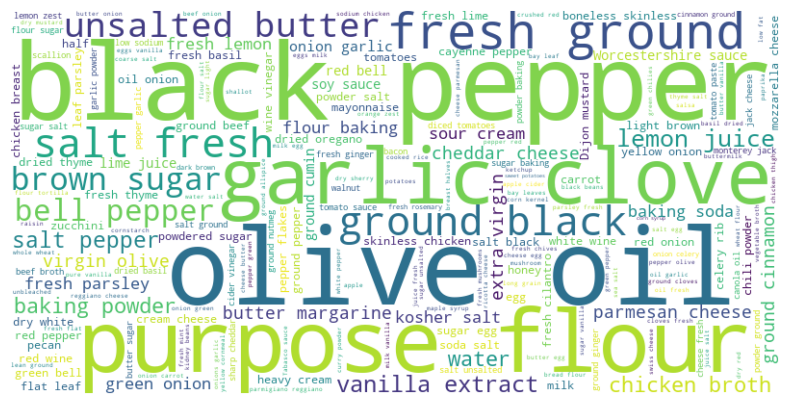

In [126]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Create an empty string to concatenate all ingredient lists
all_ingredients = ""

# Iterate over each row in the 'RecipeIngredientParts' column
for ingredients_list in top_author['RecipeIngredientParts']:
    # Join the ingredients list into a single string
    ingredients_string = ' '.join(ingredients_list)
    # Concatenate the string with all ingredients
    all_ingredients += " " + ingredients_string

# Generate the word cloud from all ingredients
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_ingredients)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

I would think all those peppers, olive oil and garlics are used for the meaty recipes, and flour, vanilla extract, and baking soda for the the desserts.

Let's check out their top-rated recipe:

In [85]:
top_author['ReviewCount'].sort_values(ascending=False).dropna()

25250     612.0
22316     309.0
22278     263.0
59446     248.0
36733     223.0
          ...  
140496      1.0
140495      1.0
140494      1.0
140278      1.0
502783      1.0
Name: ReviewCount, Length: 3098, dtype: float64

In [127]:
recipes.loc[25250]

RecipeId                                                                28768.0
AuthorId                                                                  37779
Description                   My family's favorite. This is a very meaty las...
RecipeCategory                                                            Dairy
Keywords                           [Meat, European, Weeknight, Oven, < 4 Hours]
RecipeIngredientQuantities    [1 1⁄2, 1⁄2, 1, 2 -3, 1, 1, 1, 1, 1, 2, 12, 24...
RecipeIngredientParts         [lean ground beef, Italian sausage, onion, gar...
ReviewCount                                                               612.0
Calories                                                                  540.5
FatContent                                                                 29.6
SaturatedFatContent                                                        15.1
CholesterolContent                                                        142.3
SodiumContent                           

In [198]:
recipes.loc[25250]['url']

'https://www.food.com/recipe/Absolute-Best-Ever-Lasagna-28768'

It's a lasagna, and it sure does look yummy!

## Correlation Between Variables  <a class ='author' id='corr'></a>

Let's take a look at correelations between different variables in our dataset.

In [186]:
matrix = recipes.corr(numeric_only=True)
matrix

,RecipeId,AuthorId,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,YearPublished,MonthPublished,DayPublished,HourPublished,TotalMinutes,CorrectAggregatedRating
RecipeId,1.000000,0.255584,-0.119986,-0.023462,-0.014314,-0.017051,-0.018058,-0.005428,-0.024017,0.000458,-0.023434,-0.008942,-0.000519,0.959403,0.004349,0.004863,-0.282798,0.002467,0.064282
AuthorId,0.255584,1.000000,-0.009010,0.005597,0.005948,0.005722,0.011599,0.005012,0.000200,0.008554,-0.002163,0.012042,-0.001247,0.372840,0.011449,0.006288,0.010520,0.011417,-0.004089
ReviewCount,-0.119986,-0.009010,1.000000,-0.003243,-0.003156,-0.001894,-0.000957,0.003121,-0.002562,-0.009041,-0.002172,0.001927,0.000033,-0.122350,-0.001410,0.000914,0.037679,0.011114,-0.003635
Calories,-0.023462,0.005597,-0.003243,1.000000,0.855637,0.832769,0.619356,0.172559,0.615499,0.401390,0.564226,0.655276,-0.008512,-0.021356,0.009755,-0.003879,0.007898,0.045552,-0.012563
FatContent,-0.014314,0.005948,-0.003156,0.855637,1.000000,0.971745,0.653320,0.144271,0.133113,0.177046,0.097771,0.620238,-0.011762,-0.012477,0.006270,-0.002769,0.004623,0.029951,-0.001388
SaturatedFatContent,-0.017051,0.005722,-0.001894,0.832769,0.971745,1.000000,0.669378,0.131565,0.129998,0.185495,0.097429,0.618262,-0.010721,-0.014987,0.007200,-0.002669,0.005423,0.029730,-0.002396
CholesterolContent,-0.018058,0.011599,-0.000957,0.619356,0.653320,0.669378,1.000000,0.119947,0.127829,0.086883,0.097968,0.707245,-0.006679,-0.014750,0.002832,-0.001448,0.006742,0.049749,-0.011583
SodiumContent,-0.005428,0.005012,0.003121,0.172559,0.144271,0.131565,0.119947,1.000000,0.099275,0.127017,0.071876,0.163970,-0.005363,-0.003326,0.001391,0.000400,0.002303,0.033195,-0.004348
CarbohydrateContent,-0.024017,0.000200,-0.002562,0.615499,0.133113,0.129998,0.127829,0.099275,1.000000,0.527203,0.960443,0.181900,-0.002962,-0.023121,0.011215,-0.003374,0.008447,0.023512,-0.021530
FiberContent,0.000458,0.008554,-0.009041,0.401390,0.177046,0.185495,0.086883,0.127017,0.527203,1.000000,0.385734,0.254252,-0.011899,0.000723,0.002079,-0.002704,-0.001302,0.044724,-0.002575


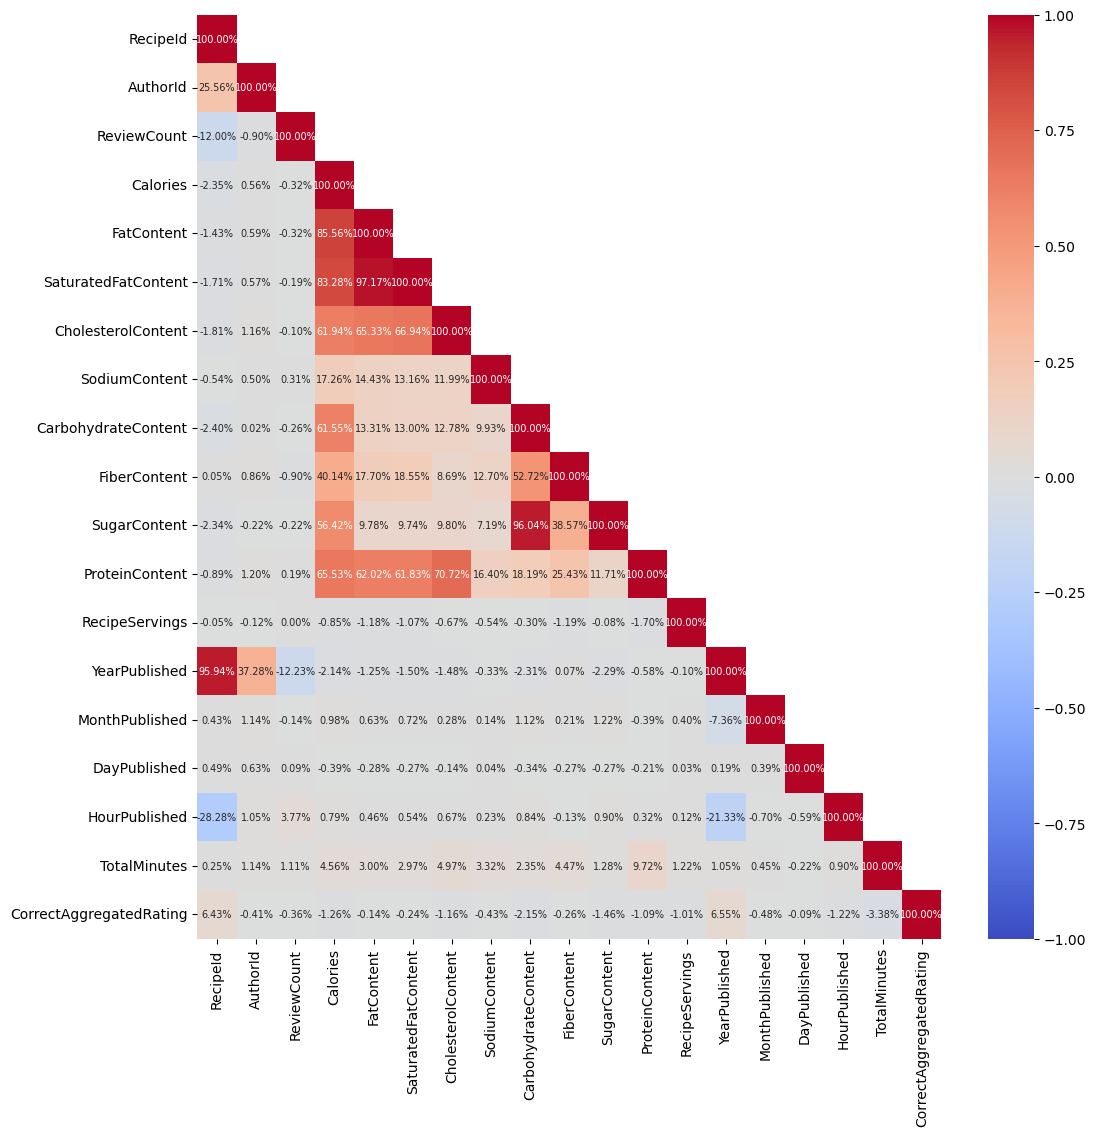

In [156]:
matrix = recipes.corr(numeric_only=True)

plt.figure(figsize=(12,12))

mask = ~np.tri(matrix.shape[0], k=0, dtype=bool)
sns.heatmap(matrix,cmap='coolwarm',mask=mask,annot=True,fmt=".2%",annot_kws={"fontsize": 7},vmax=1, vmin=-1, center=0)
plt.show()

Lots of strong correlations! Let's explore some of them:

- High correlation between calories and fat content: The high positive correlation (86%) between calories and fat content suggests that recipes with higher fat content tend to have more calories. This is expected since dietary fat is more calorie-dense compared to other macronutrients. Recipes containing ingredients rich in fat, such as oils, butter, or fatty meats, are likely to contribute to both higher fat content and calorie levels.

- High correlation between cholesterol content and saturated fat content: The positive correlation between cholesterol content and saturated fat content (67%) indicates that recipes with higher saturated fat content are also likely to have higher cholesterol levels. This correlation aligns with the fact that foods high in saturated fat, such as red meat, full-fat dairy products, and certain oils, tend to be associated with higher cholesterol content.

- High correlation between fiber content and carbohydrate content: The positive correlation (53%) between fiber content and carbohydrate content suggests that recipes with higher carbohydrate content also tend to have higher fiber content. This relationship is logical as many fiber-rich foods, such as whole grains, legumes, fruits, and vegetables, also tend to be good sources of carbohydrates.

These are mainly nutritional variables. But we have some other highly correlated variables that have nothing to nutritional values:

- Negative correlation between review count and recipe ID: The negative correlation (-12%) between review count and recipe ID might indicate that recipes with higher recipe IDs, which represent the order of recipe entry, tend to have lower review counts. This correlation could be a reflection of the fact that popular or well-established recipes, which have been in the dataset for longer, have accumulated more reviews over time. In other words, the more recent recipes (which have higher recipe ids) have less reviews.

- High correlation between year published and recipe ID: The strong positive correlation (96%) between year published and recipe ID indicates that as the years progress, recipe IDs tend to increase. This relationship is likely due to the sequential assignment of recipe IDs, where newer recipes are assigned higher IDs than older recipes.

Ok this all sounds great. But how do we know these correlations are actually significant?

To determine if the observed correlations in your data are statistically significant, we can employ hypothesis testing. There are several statistical tests available to assess the significance of correlations. Here are two common approaches to test the significance of correlations. One of them is Pearson correlation significance test.

**The Pearson correlation coefficient** measures the linear relationship between two variables. To assess its significance, you can use the t-test for correlation. The null hypothesis (H0) assumes that there is no correlation between the variables, and the alternative hypothesis (H1) assumes a nonzero correlation. The t-test calculates a test statistic, typically denoted as t, and its associated p-value. If the p-value is below a predetermined significance level (e.g., 0.05), you can reject the null hypothesis and conclude that there is a statistically significant correlation between the variables.

Below I assess the Person correlation of some of the variables.

**Hypothesis testing**

We want to assess if the corr between various variables are statistically significant. In the case of each pair, we have

* H0: No correlation between apple and pear prices (rho=0)
* H1: The correlation is not zero 

Let's first check out the nutritional variables:

In [159]:
nutritional_cols = ['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
        'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
        'ProteinContent']

Index(['RecipeId', 'AuthorId', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'YearPublished', 'MonthPublished', 'DayPublished',
       'HourPublished', 'TotalMinutes', 'CorrectAggregatedRating'],
      dtype='object')

In [175]:
from scipy import stats

for i in nutritional_cols:
    for j in nutritional_cols:
        if i!=j:
            print(f"Pearson correlation between {i} and {j}: {stats.pearsonr(recipes[i], recipes[j])[0]:.2f}, p-value: {stats.pearsonr(recipes[i], recipes[j])[1]}")

Pearson correlation between Calories and FatContent: 0.86, p-value: 0.0
Pearson correlation between Calories and SaturatedFatContent: 0.83, p-value: 0.0
Pearson correlation between Calories and CholesterolContent: 0.62, p-value: 0.0
Pearson correlation between Calories and SodiumContent: 0.17, p-value: 0.0
Pearson correlation between Calories and CarbohydrateContent: 0.62, p-value: 0.0
Pearson correlation between Calories and FiberContent: 0.40, p-value: 0.0
Pearson correlation between Calories and SugarContent: 0.56, p-value: 0.0
Pearson correlation between Calories and ProteinContent: 0.66, p-value: 0.0
Pearson correlation between FatContent and Calories: 0.86, p-value: 0.0
Pearson correlation between FatContent and SaturatedFatContent: 0.97, p-value: 0.0
Pearson correlation between FatContent and CholesterolContent: 0.65, p-value: 0.0
Pearson correlation between FatContent and SodiumContent: 0.14, p-value: 0.0
Pearson correlation between FatContent and CarbohydrateContent: 0.13, p-v

The pvals are less than my significance level (5%), so we can reject the null hypotheses and state that the correlations between various nutritional variables are statistically significant. The other correlations also seem statistically significant. For instance:

In [185]:
stats.pearsonr(recipes['YearPublished'], recipes['AuthorId'])

PearsonRResult(statistic=0.37283973616150595, pvalue=0.0)

In [184]:
stats.pearsonr(recipes['HourPublished'], recipes['RecipeId'])

PearsonRResult(statistic=-0.2827982547914398, pvalue=0.0)

## Time Series Analysis  <a class ='author' id='time'></a>

In [132]:
import warnings

# Ignore the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Your code generating the warning
recipes.groupby('YearPublished').mean()

,RecipeId,AuthorId,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,MonthPublished,DayPublished,HourPublished,TotalMinutes,CorrectAggregatedRating
YearPublished,,,,,,,,,,,,,,,,,,
1999,3037.128135,1.008519e+04,10.983254,880.550900,43.142939,17.410469,145.013304,1165.487541,99.904798,6.260224,55.058479,25.707525,8.089462,9.944111,14.001091,9.922846,43.592421,4.203819
2000,7457.297985,7.236553e+04,6.491111,468.308696,25.592153,10.119300,91.262725,827.204401,43.154772,3.232078,19.567922,16.710657,7.472050,3.284730,9.861612,18.034995,50.125133,4.231361
2001,12567.067669,1.618375e+04,11.759431,505.805406,24.683433,9.908361,85.765764,696.161123,55.313599,3.918188,27.650259,16.328208,7.661857,9.199507,16.187062,12.666191,66.386311,4.262145
2002,33103.037281,2.975290e+04,10.577156,562.031461,28.285984,11.374735,98.625869,915.739065,59.708458,4.005500,29.565236,18.477200,7.904882,6.540640,16.107900,17.232561,63.733146,4.371953
2003,64802.487948,5.665568e+04,8.212563,588.607470,30.249193,12.026198,103.842704,925.114773,61.606602,4.204406,30.258729,19.004773,9.398010,6.315641,14.272709,19.956387,65.790651,4.413572
2004,93688.826988,8.888411e+04,7.406793,565.165079,28.960200,11.369284,100.713876,809.094896,58.383227,3.969932,28.254946,18.921285,8.677349,6.226486,15.514015,19.606385,67.613655,4.417646
2005,128577.789474,1.327281e+05,5.831315,499.426584,25.458663,10.046481,90.175291,790.849741,51.164404,3.728055,23.783698,17.394966,8.722635,6.664333,16.038047,16.323570,64.081776,4.433521
2006,176316.148729,1.961946e+05,4.354864,475.979439,23.708695,9.371003,85.398955,703.930995,49.178663,3.693137,22.684120,17.212200,8.270980,6.636931,16.138458,16.850649,64.167072,4.426852
2007,238877.957495,3.111389e+05,3.731351,458.227892,23.809528,9.183464,82.799506,713.606082,44.178658,3.568970,18.792623,17.142535,9.085398,6.598541,15.920432,16.323172,61.826192,4.432571


Let's see how various nutritional factors in recipes have changed over time:

In [137]:
recipes.columns

Index(['RecipeId', 'AuthorId', 'Description', 'RecipeCategory', 'Keywords',
       'RecipeIngredientQuantities', 'RecipeIngredientParts', 'ReviewCount',
       'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
       'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
       'ProteinContent', 'RecipeServings', 'RecipeInstructions', 'url',
       'YearPublished', 'MonthPublished', 'DayPublished', 'HourPublished',
       'TotalMinutes', 'CorrectAggregatedRating'],
      dtype='object')

In [138]:
nutritional_cols = ['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
        'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
        'ProteinContent']

In [148]:
recipes['YearPublished'].value_counts()

2007    70204
2008    69485
2009    58036
2006    51409
2005    41002
2010    37375
2002    32456
2003    29372
2004    26686
2011    24993
2012    20895
2013    18203
2014     8638
2001     7714
2017     4998
2015     4845
2016     4269
1999     3668
2018     3035
2000     1886
2019     1789
2020     1554
Name: YearPublished, dtype: int64

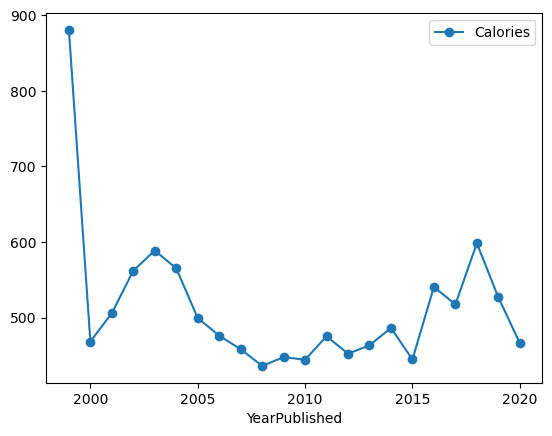

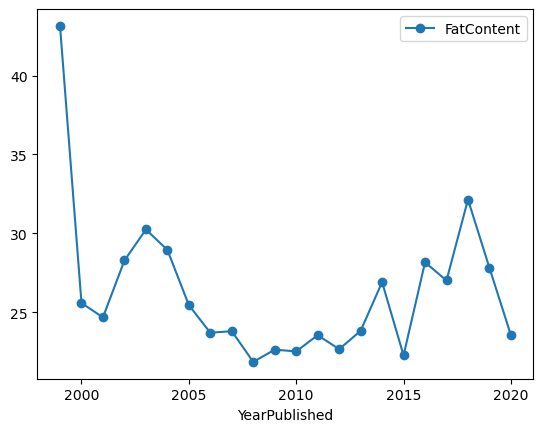

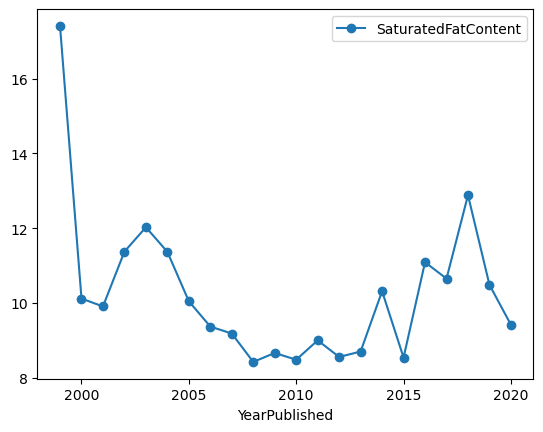

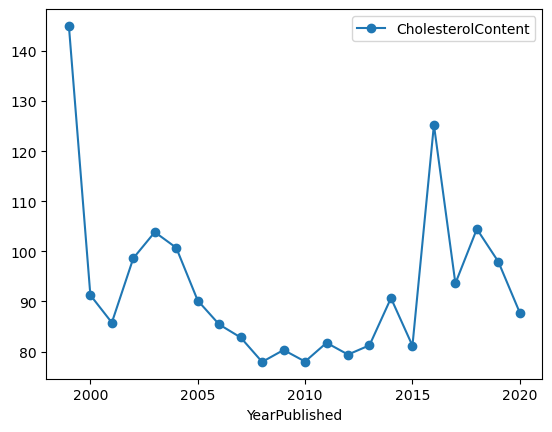

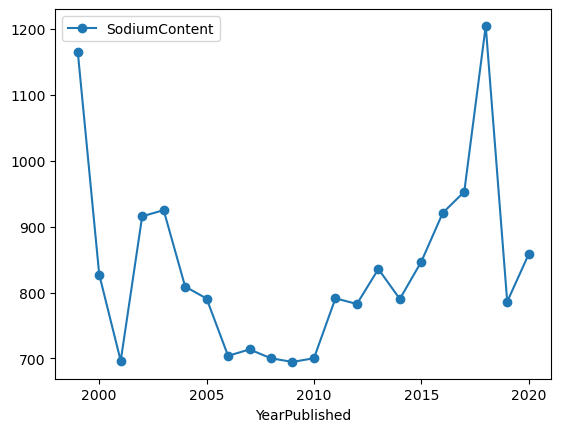

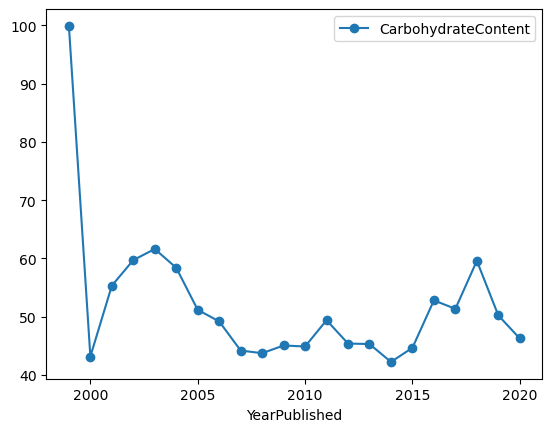

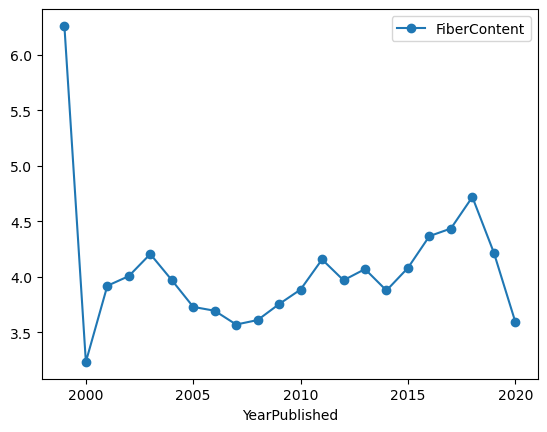

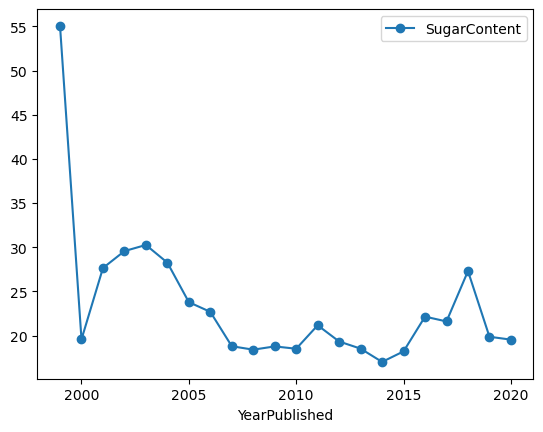

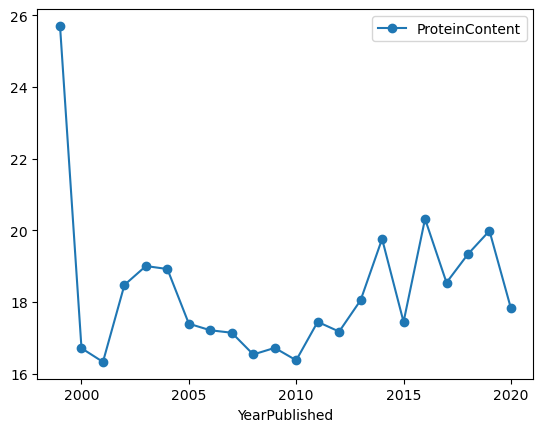

In [197]:
for col in nutritional_cols:
    recipes.groupby('YearPublished').mean()[[col]].plot(marker='o')
    plt.show()

We can see that calories, fat content, cholesterol content and sodium content have similar patterns over time: they all start fairly high in 1999 and go down in early 2000's, come back up around 2003-2004 and go down starting around 2004 all the way to 2015, and then start to raise again. The pattern is interesting, though the fact that these particular variables change together is less so, as they are highly corelated (as explored elsewhere in the notebook).

Fiber contents of the recipes, however, seems to have an overall growth patter since 2000

**Some thoughts:**

- Similar patterns in calories, fat, cholesterol, and sodium content suggest that there might be some common factors or influences affecting these variables over time. The initial high values in 1999, followed by a decline in the early 2000s, and then an increase around 2003-2004, followed by a decrease again, could be indicative of changes in dietary trends, food production methods, or recipe preferences during those periods. The subsequent increase in recent years might reflect changes in consumption patterns or recipe formulation.

- Fiber content growth pattern: The overall growth pattern in fiber content since 2000 indicates a potential positive shift in the inclusion of fiber-rich ingredients in recipes over time. This trend suggests an increased emphasis on healthier ingredients and dietary choices, as fiber is known to have various health benefits. The rise in fiber content could be a result of increased awareness about the importance of dietary fiber or a shift towards incorporating more whole grains, fruits, and vegetables in recipes.

Now let's check out how the number of recipes published accross the years, months, etc.:

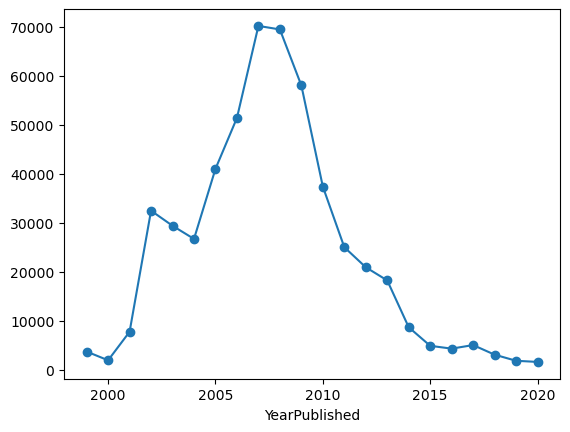

In [194]:
recipes.groupby('YearPublished').count()['RecipeId'].plot(marker='o');

This confirms our previous analyses that showed 2007 has seen a peak in terms of the number of recipes uploaded on the website, and has dropped since then. This could mean less engagement with the website, perhaps, due to competitive services emerging in the market: people probably found other platforms or mediums to post their foods around that time, or something unprecendented happended that we're unaware of.

Let's see if the ratings have evolved through time:

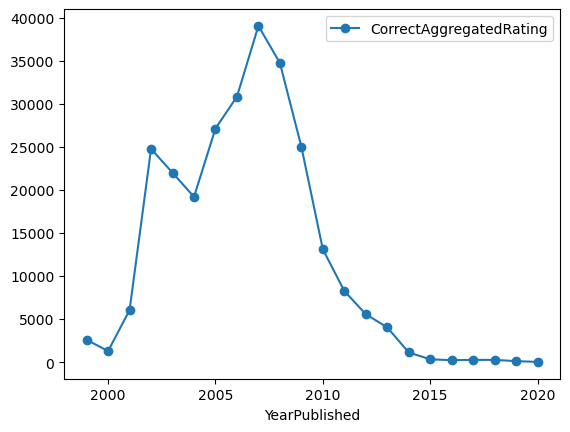

In [195]:
recipes[['YearPublished','CorrectAggregatedRating']].groupby('YearPublished').count().plot(marker='o');

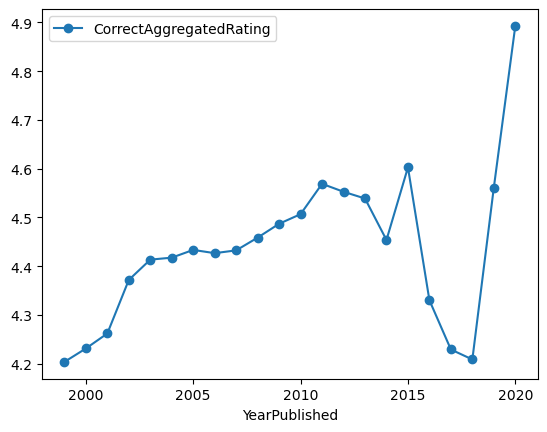

In [196]:
recipes[['YearPublished','CorrectAggregatedRating']].groupby('YearPublished').mean().plot(marker='o');

A few thoughts here:

- The total number of ratings has also seen its peak in 2007, and then continiously declined. Just like the number of recipes, this could mean less engagement with the website, perhaps, due to competitive services emerging in the market. 

- The *average* (accumulated) rating per recipe, however, seems to have gone through a different journey throughout the years: overall, and up tp 2015, there is a positive trend in the average rating given to a recipe. 

- This could mean recipes have improved, or people have become nicer in leaving reviews! This coould also be due to other possibilities, such as the idea that older recipes have received more reviews, good and bad, in comparision to more recent rcipes, which have less but perhaps higher ratings attached to them. This latter hypothesis doesn't sound too plausible to me, however, due to the strange fall starting 2015 to 2018.
- It would be interesting to see what has caused the decline of average ratings in the period of 2015-2018. Maybe this has to do with the spikes in recipe fat content, callories, sodium content and sugar content that we noticed earlier in that period, and the possibility that people at the time had started easting healthier (which was also suggested by a similar spike in fiber content of the recipes in the same period). 

For now, I won't puress these issues more, due to the scope of our project. 

## Conclusion
In this notebook we performed a thorough analysis of our recipes dataset that was cleaned and enhanced in the prebious steps. Many insights have been derived, and certainly much more can be gained by closer inspection of the data.